### Problem Statement
#You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
#If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
#If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
#The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


In [162]:
# Import libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [163]:
# Read CSV file and describe the attributes of the csv file
loan = pd.read_csv('C:\\Users\\91903\\Downloads\\loan_lc\\loan.csv',dtype = 'object')
print("Old Shape :")
print(loan.shape)


print(loan.info())
print(loan.dtypes)


Old Shape :
(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None
id                            object
member_id                     object
loan_amnt                     object
funded_amnt                   object
funded_amnt_inv               object
                               ...  
tax_liens                     object
tot_hi_cred_lim               object
total_bal_ex_mort             object
total_bc_limit                object
total_il_high_credit_limit    object
Length: 111, dtype: object


In [97]:
#Data Cleaning
# 1. Check for the duplicate entries
duplicate = loan[loan.duplicated()]
print("Count of Duplicate Rows :")
duplicate

 

Count of Duplicate Rows :


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [98]:
#Data Cleaning
#2 Find sum of rows having missing value
print(loan.isnull().all(axis=1).sum())

# Result = There is no empty rows

0


In [99]:
#Data Cleaning
#3 Find sum of col having missing value
print(loan.isnull().all(axis = 0).sum())

# Result = 54 , There are 54 columns having missing value


54


In [100]:
# Data Cleaning
# 4 Find the column which is having the missing values
loan.isnull().sum()



id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [101]:
# Drop additional columns as we don't need these as they are mostly nulls 
# And also drop other columns which we donot need for analysis as they are customer behavior variable
loan.drop(loan.iloc[:, 53:105], inplace = True, axis = 1) 
loan.keys()

columns_to_drop = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type']
loan.drop(labels = columns_to_drop, axis = 1, inplace = True)



In [102]:
loan.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object')

In [103]:
columns_to_drop_2 = ['pub_rec_bankruptcies','tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit','total_il_high_credit_limit']
loan.drop(labels = columns_to_drop_2, axis = 1, inplace = True)

In [104]:
# Recheck if any column and Row is holding missing  Value
print(loan.isnull().all(axis = 0).sum())
print(loan.isnull().all(axis=1).sum())



0
0


In [105]:
print("New Shape is : ")
print(loan.shape)

## Result
#New Shape is : 
(39717, 25)


New Shape is : 
(39717, 25)


(39717, 25)

In [106]:
loan.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti'],
      dtype='object')

In [107]:
# Data Cleaning 
loan['int_rate']
# Remove % symbol from "int_rate" , else it cannot be used for computations
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate']



0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [108]:
# Data Cleaning 
#Remove "</>,+,years,etc" from column"emp_length" so that it contains only numeric value
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan['emp_length']


#Convert the important column to numeric so that mean,sd,etc can be done
col = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
loan[col] = loan[col].apply(pd.to_numeric)


In [109]:
#show all data types
print(loan.dtypes)

id                      object
member_id               object
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
url                     object
desc                    object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
dtype: object


## Removal of Outliers based upon "Annual_inc"




In [110]:
''' Detection of Outliers '''
# IQR
Q1 = np.percentile(loan['annual_inc'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(loan['annual_inc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", loan.shape)
 
# Upper bound
upper = np.where(loan['annual_inc'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(loan['annual_inc'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
loan.drop(upper[0], inplace = True)
loan.drop(lower[0], inplace = True)
 
print("New Shape: ", loan.shape)

Old Shape:  (39717, 25)
New Shape:  (37874, 25)


## Correaltion Matrix

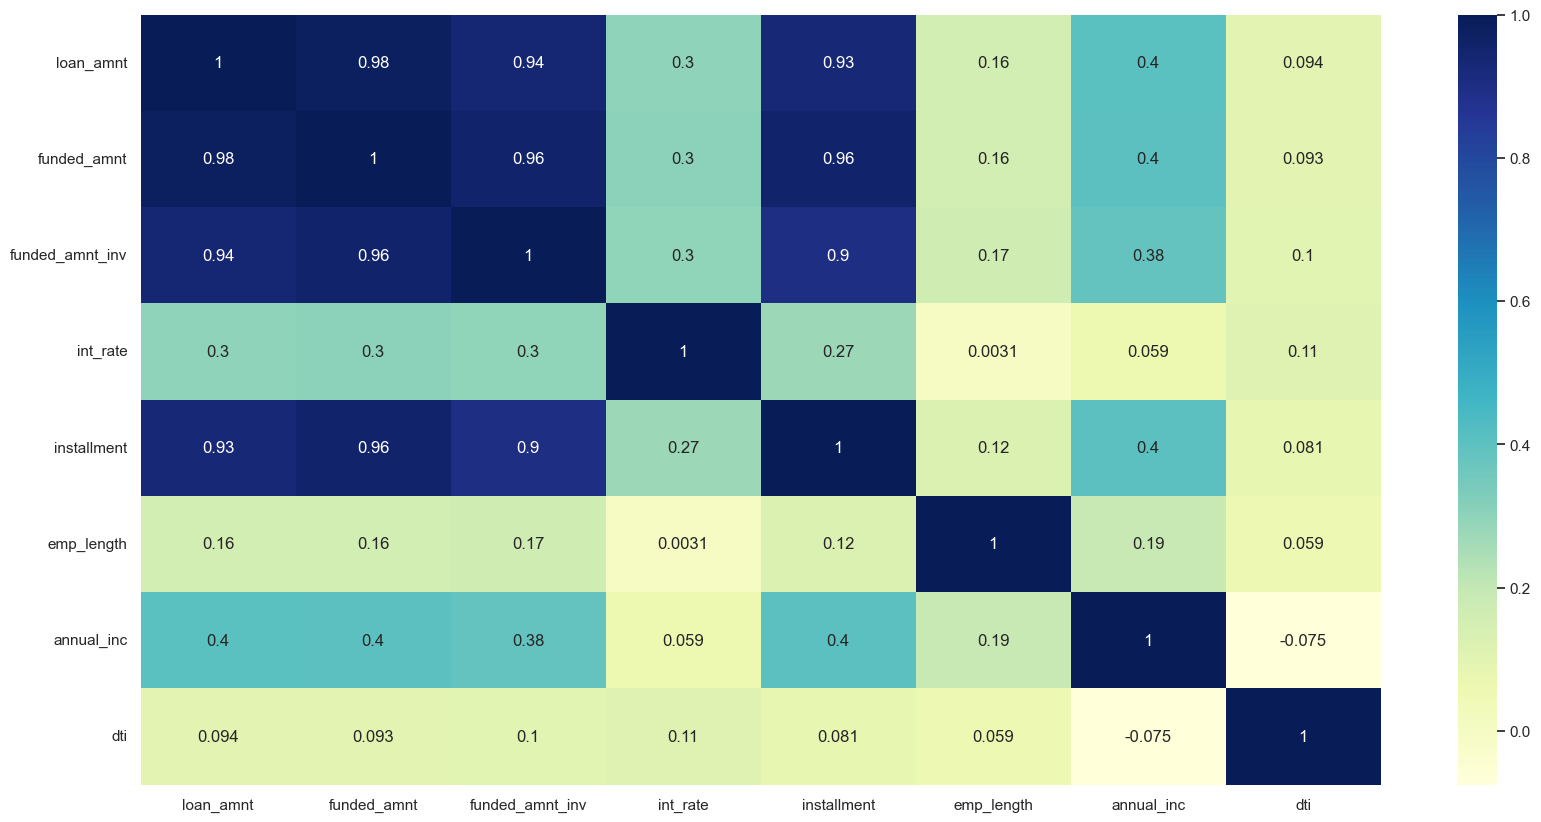

In [111]:
# plotting correlation heatmap
dataplot = sns.heatmap(loan.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## Analysis based upon correlation Matrix
#### 1. Loan amount, investor amount, funding amount are strongly correlated(near to 1).
#### 2. Annual income and DTI(Debt-to-income ratio) is negatively correalted(-0.075).
####  Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts. 
#### This means when annual income is low  then DTI is high & vice versa.
#### 3.Positive correlation between annual income and employment years(0.19) which means borrower income increases with employment  length ie work experience
#### 4. Going ahead we will work only with 'Loan Amount as the Loan Amount, Funded Amount and Funded Amount Inv are strongly 
####     correlated. This we can confirm further by seeing the distribution plot


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distr

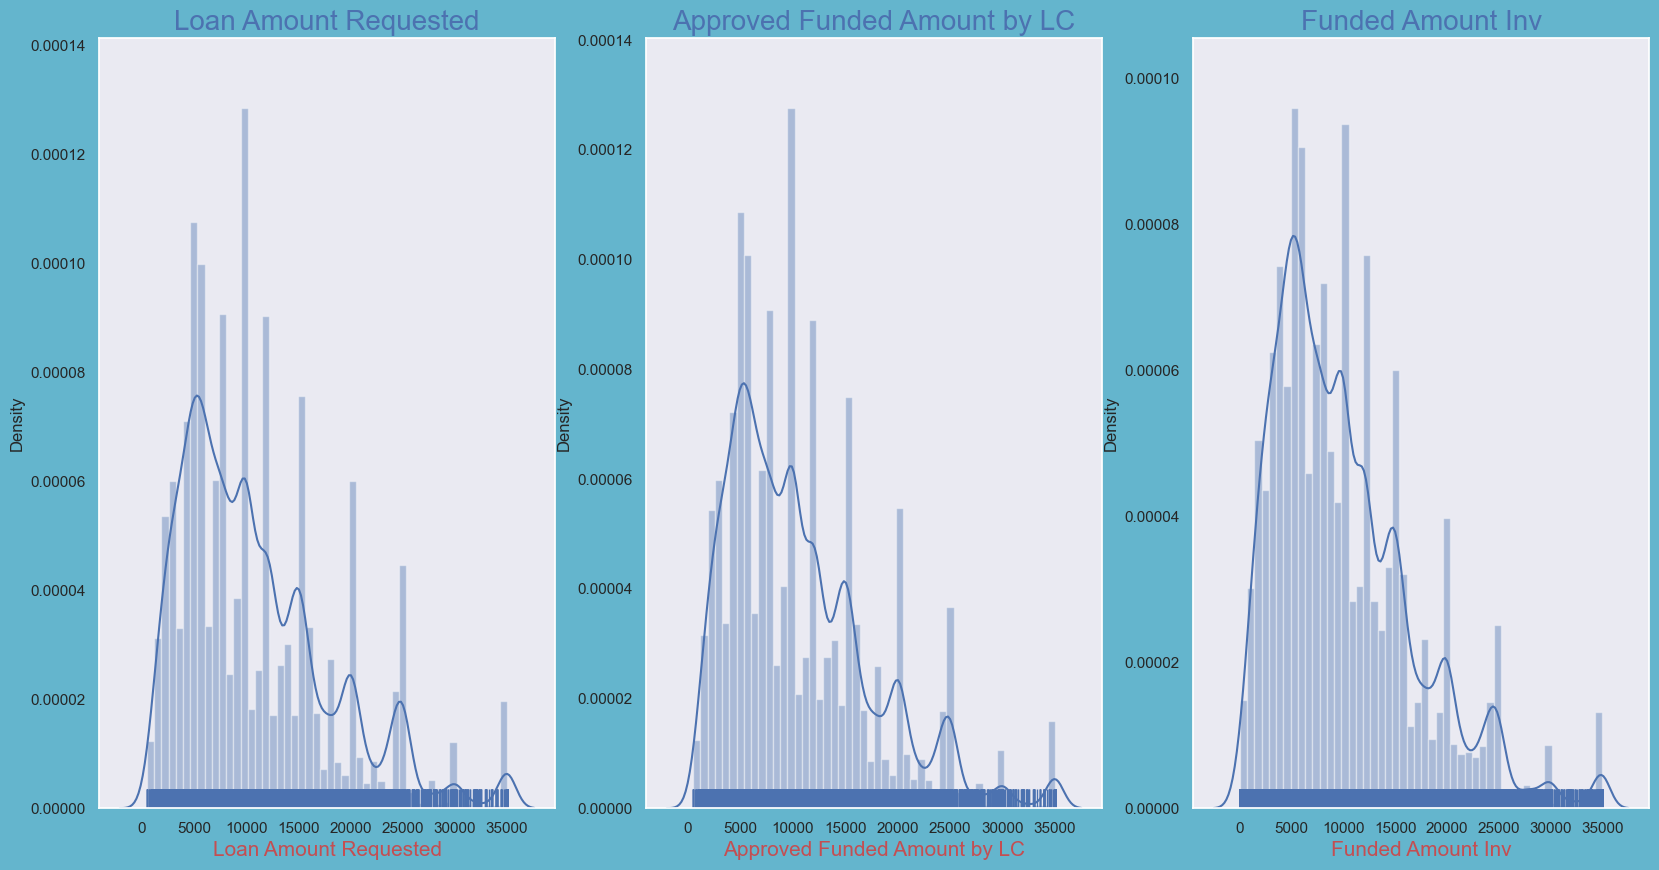

In [112]:
# Distribution of three loan amount fields using distribution plot.
plt.figure(figsize=(20,10),facecolor='c')
sns.set_style("dark")
# subplot 1
ax = plt.subplot(1,3,1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount Requested',fontsize=20,color='b')
ax.set_xlabel('Loan Amount Requested',fontsize=15,color='r')
# subplot 2
plt.subplot(1, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Approved Funded Amount by LC',fontsize=20,color='b')
ax.set_xlabel('Approved Funded Amount by LC',fontsize=15,color='r')
# subplot 2
plt.subplot(1, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv',fontsize=20,color='b')
ax.set_xlabel('Funded Amount Inv',fontsize=15,color='r')
plt.show()



### Analysis & Assumption
### Distribution of all three amounts for all similar.
### [Important]  loan amount column will be used for rest of our analysis.

## Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


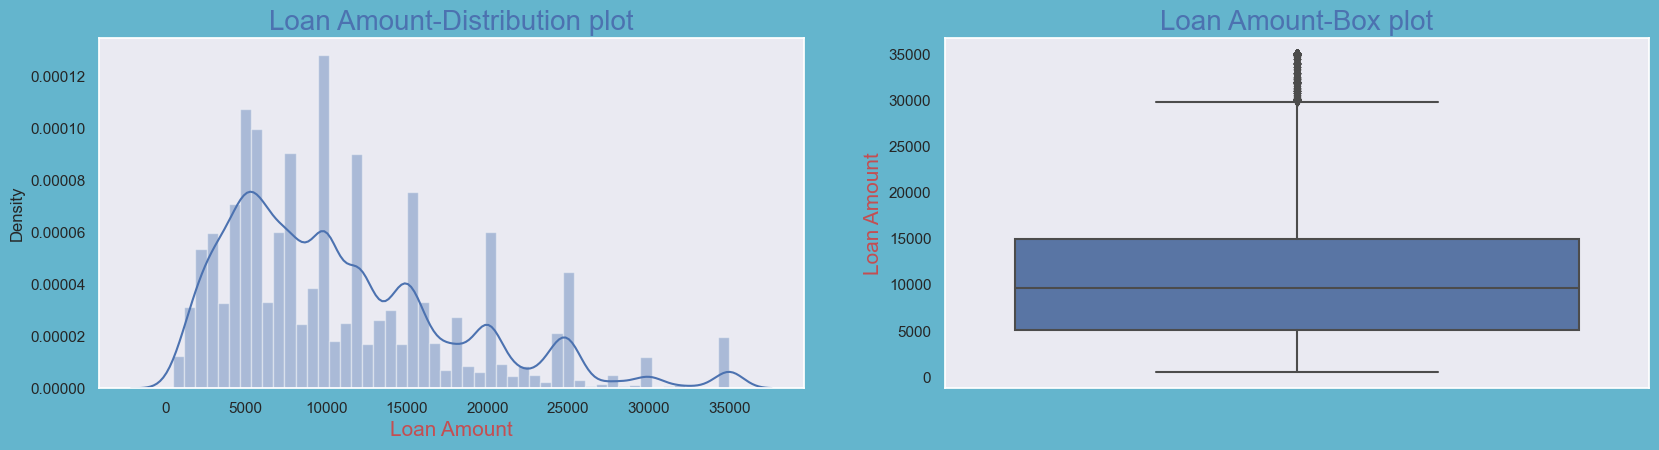

In [113]:
# Univariate Loan amounnt analysis :-
plt.figure(figsize=(20,10),facecolor='c')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['loan_amnt'])
ax.set_title('Loan Amount-Distribution plot',fontsize=20,color='b')
ax.set_xlabel('Loan Amount',fontsize=15,color='r')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount-Box plot',fontsize=20,color='b')
ax.set_ylabel('Loan Amount',fontsize=15,color='r')
plt.show()

## Analysis:-
### Loan amout is spread between 5000 -15000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


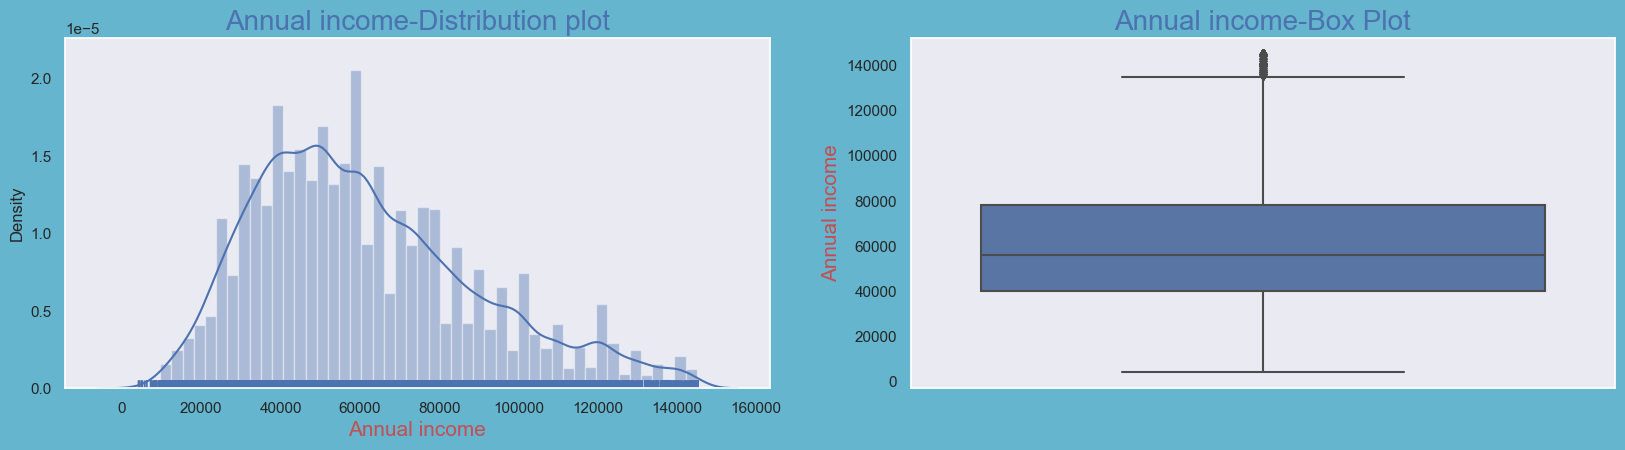

In [114]:
# Univariate Analysis on Annual Income
plt.figure(figsize=(20,10),facecolor='c')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual income-Distribution plot',fontsize=20,color='b')
ax.set_xlabel('Annual income',fontsize=15,color='r')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual income-Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual income-Box Plot',fontsize=20,color='b')
ax.set_ylabel('Annual income',fontsize=15,color='r')
plt.show()
# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

## Analysis :-
### Most of the borrower's Annual incomes are in range of 40000- 80000

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


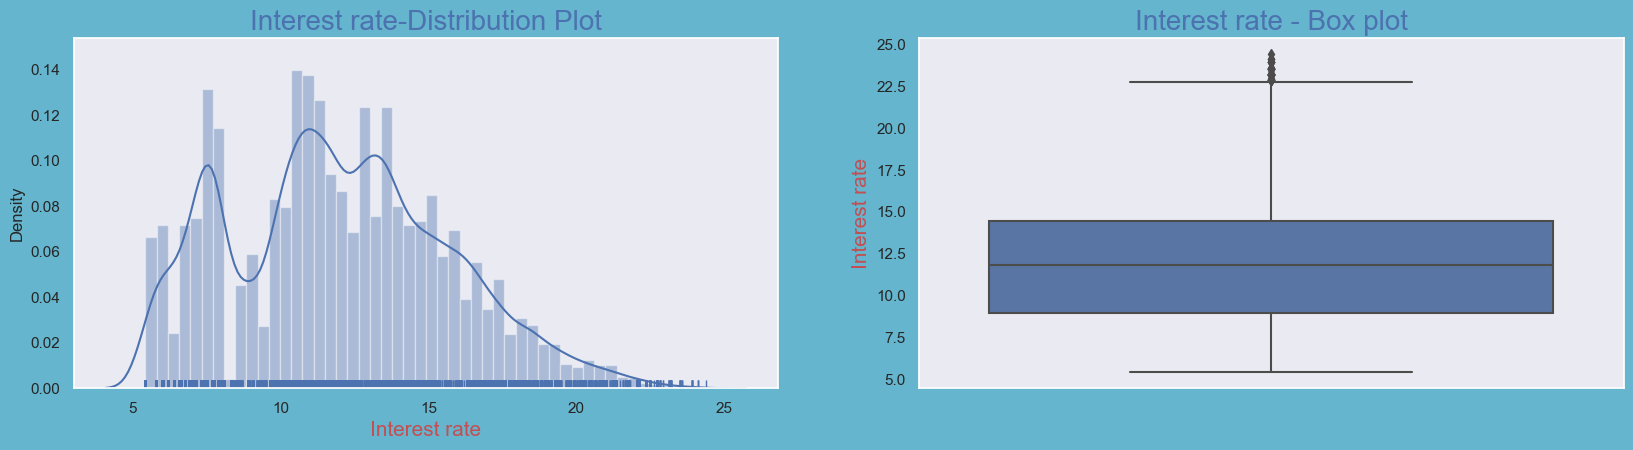

In [115]:
# Univariate Analysis on intrest rate
plt.figure(figsize=(20,10),facecolor='c')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate'],rug = True)
ax.set_title('Interest rate-Distribution Plot',fontsize=20,color='b')
ax.set_xlabel('Interest rate',fontsize=15,color='r')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate'])
ax.set_title('Interest rate - Box plot',fontsize=20,color='b')
ax.set_ylabel('Interest rate',fontsize=15,color='r')
plt.show()


## Analysis :-
### Most of the Interest rates on loans are in range of 10% - 15%

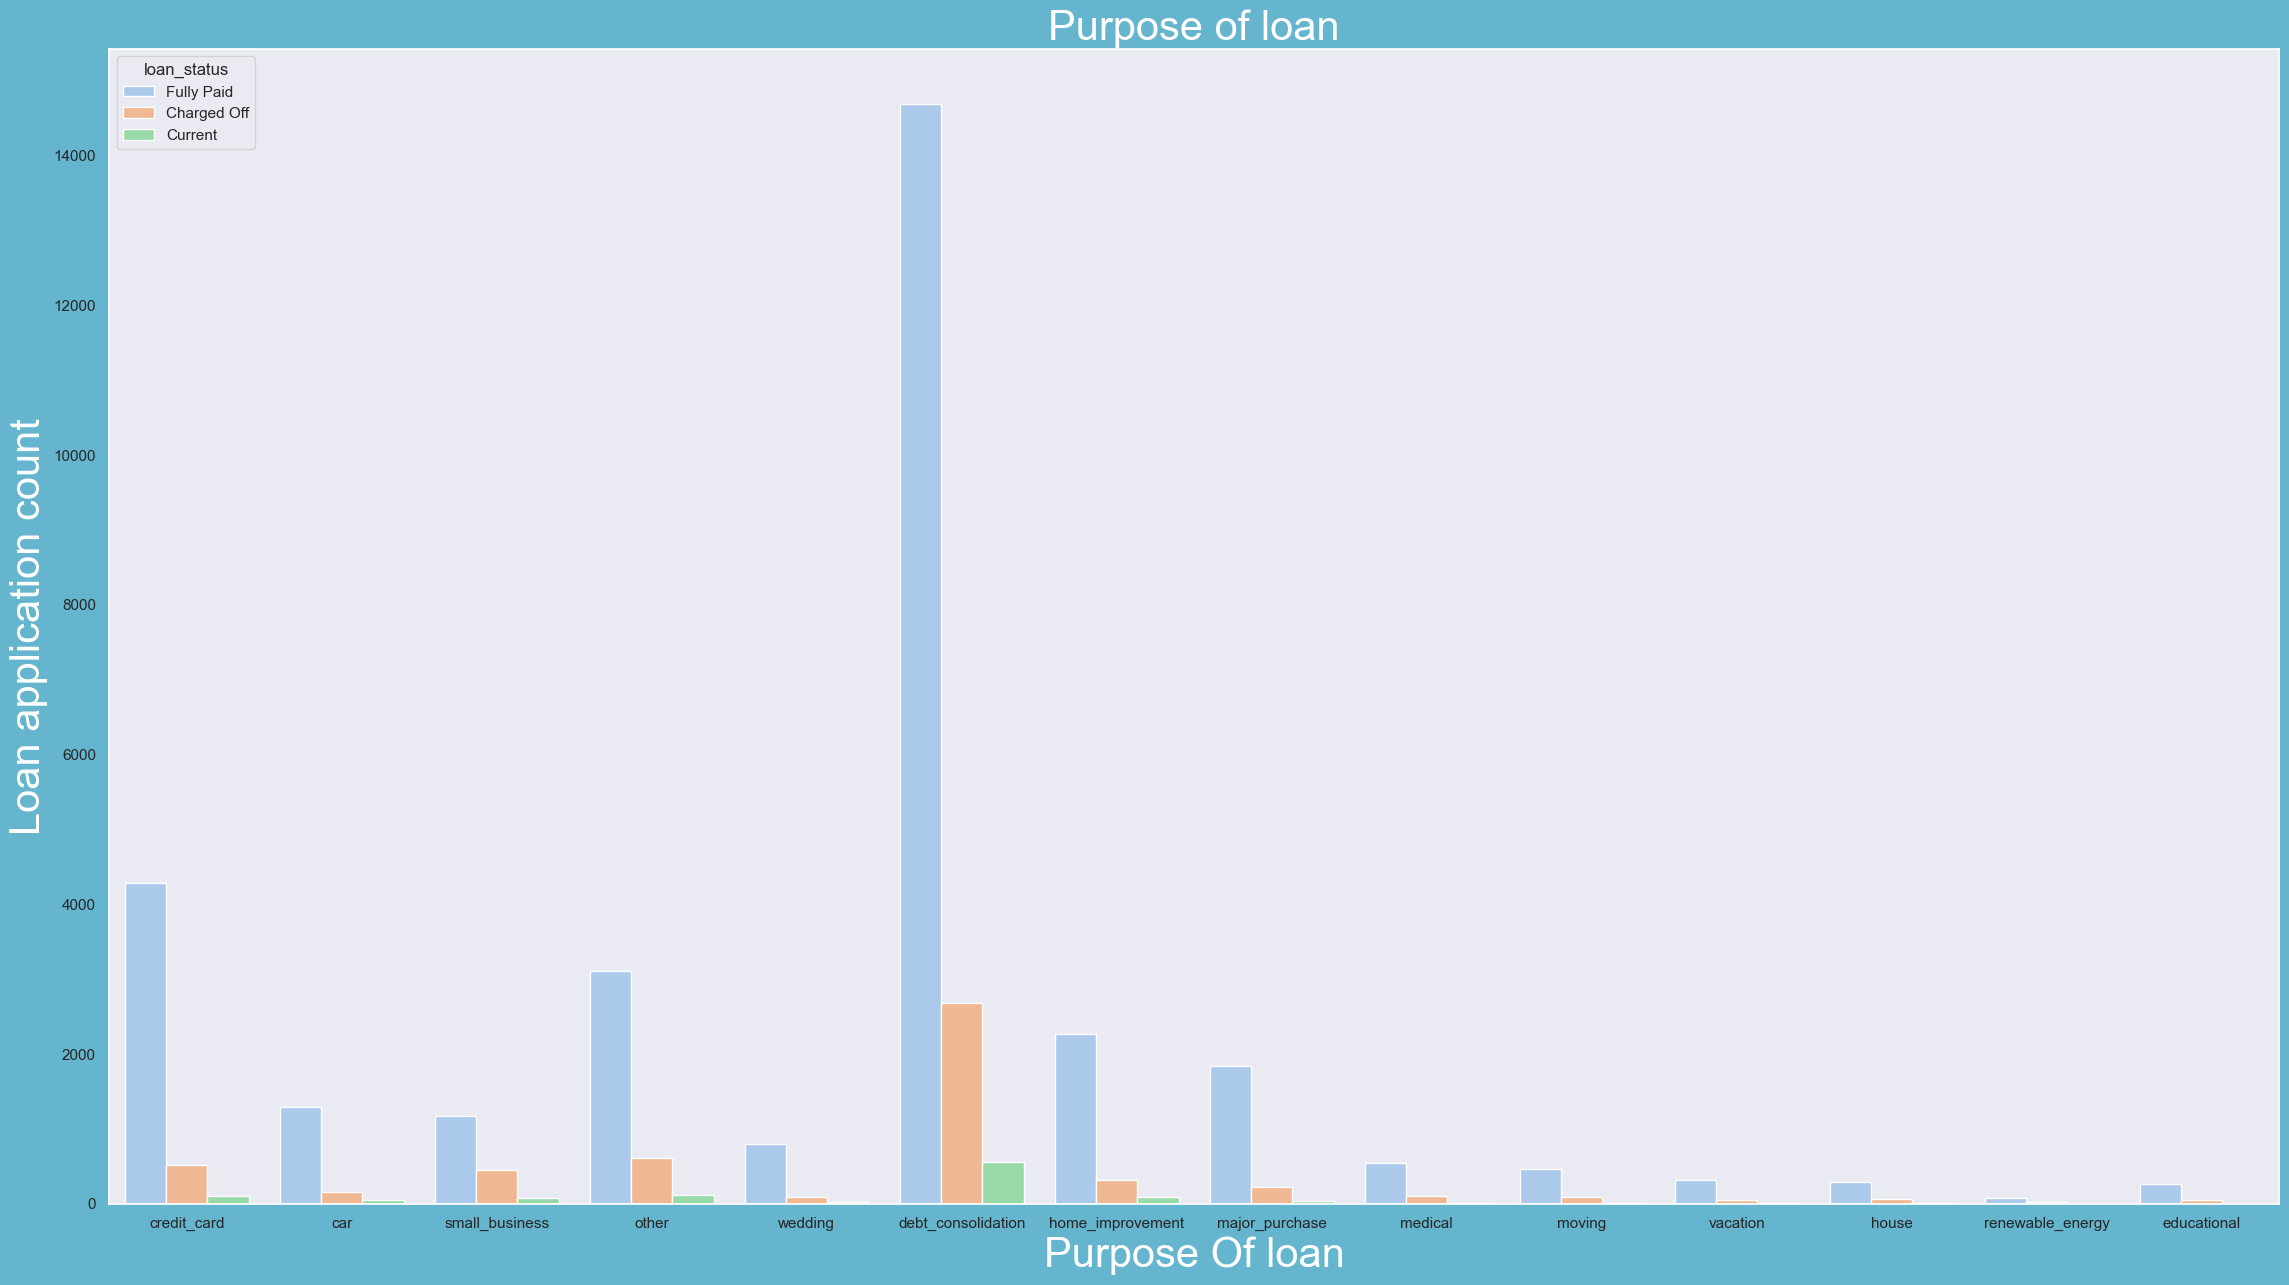

In [116]:
# Univariate Purpose of Loan
plt.figure(figsize=(28,15),facecolor='c')
sns.set_style("dark")

ax = sns.countplot(x="purpose",data=loan,hue='loan_status',palette='pastel')
ax.set_title('Purpose of loan',fontsize=30,color='w')
ax.set_xlabel('Purpose Of loan',fontsize=30,color = 'w')
ax.set_ylabel('Loan application count',fontsize=30,color = 'w')      
plt.show()

## Analysis :-
### Most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
### Charged off is higher in debt_consolidation

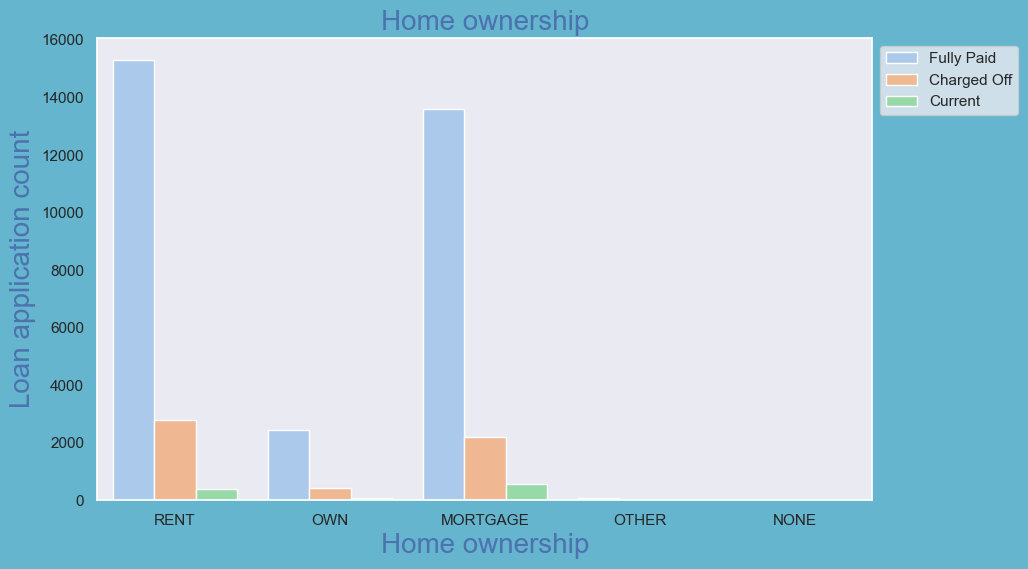

In [117]:
# Univariate Analysis - Home ownership

plt.figure(figsize=(10,6),facecolor='c')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='pastel')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home ownership',fontsize=20,color='b')
ax.set_xlabel('Home ownership',fontsize=20,color = 'b')
ax.set_ylabel('Loan application count',fontsize=20,color = 'b')      
plt.show()



## Analysis
### Most of them living in rented home or mortgage  home. 
### Therefore " Charged off"  is high in these category as the application count is high

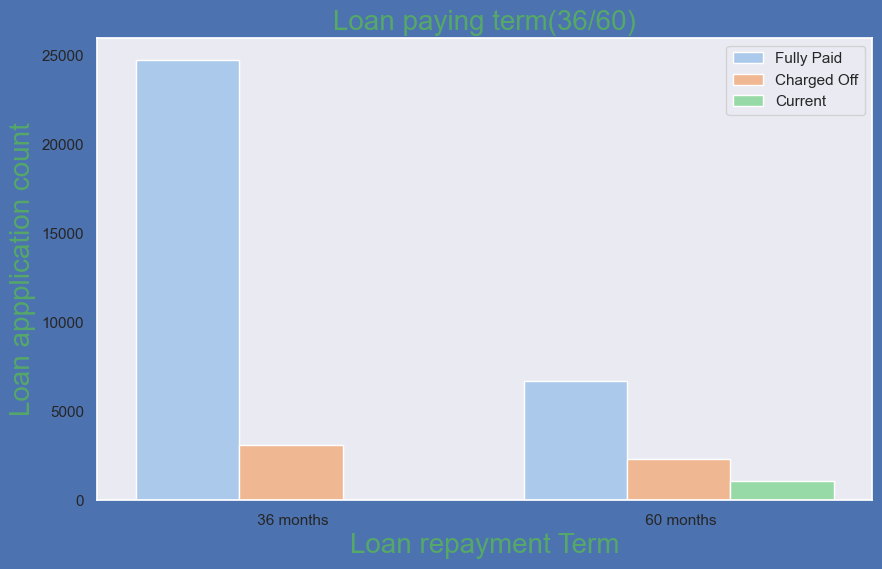

In [118]:
# Univariate Analysis - Loan paying term(36/60)

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loan,hue='loan_status',palette='pastel')
ax.legend(bbox_to_anchor=(1, 1))

ax.set_title('Loan paying term(36/60)',fontsize=20,color='g')
ax.set_xlabel('Loan repayment Term',fontsize=20,color = 'g')
ax.set_ylabel('Loan appplication count',fontsize=20,color = 'g')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()



## Analysis :-
### Those who had taken loan to repay in 36 months had more percentage of number of applicants getting  charged off as  compared to applicants who had taken loan for 60 months

In [119]:
# Bivariate Analysis

### We need to form category for the numerical  continous variable. 

In [120]:
# Derived column metrics
# categorise loan amounts into buckets for bivariate analysis.
loan['loan_amnt_category'] = pd.cut(loan['loan_amnt'], [0, 8000, 16000, 24000, 32000, 40000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets for bivariate analysis.
loan['annual_inc_category'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets for bivariate analysis.
loan['int_rate_category'] = pd.cut(loan['int_rate'], [0, 10, 13, 16, 20], labels=['0-10', '10-13', '13-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_category'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])


## we need to analyze the loan status  vs  important columns which might have played important role in charged off loans.
## Going ahead loan_status will be combined with various other parameters to understand the same.

In [121]:
# Bivariate Analysis- 1 - loan status vs Annual income category. ie proportion of charged off depending upon annual income
# Steps
# Group loans by loan status and Annual Income, get the count,use .unstack() 
# use .reset_index() to avoid using old index else the data wont be in readable format
# Create a  derived column that sums charged off,current and fully paid loans for each category.
# Divide the number of charged off loans by the total number of loans to get the proportion of charged off loans. 
# sort the table by proportion of charged off in each category issued loans.

annual_inc_vs_loan = loan.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_vs_loan['Total'] = annual_inc_vs_loan['Charged Off'] + annual_inc_vs_loan['Current'] + annual_inc_vs_loan['Fully Paid'] 
annual_inc_vs_loan['Chargedoff_Proportion'] = annual_inc_vs_loan['Charged Off'] / annual_inc_vs_loan['Total']
annual_inc_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_category,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,927,293,7308,8528,0.108701


## Analysis :-

### Annual Income range 80000+  has less chances of charged off.
### Annual Income range 0-20000 has high chances of charged off.
### With increase in annual income charged off proportion got decreased. 



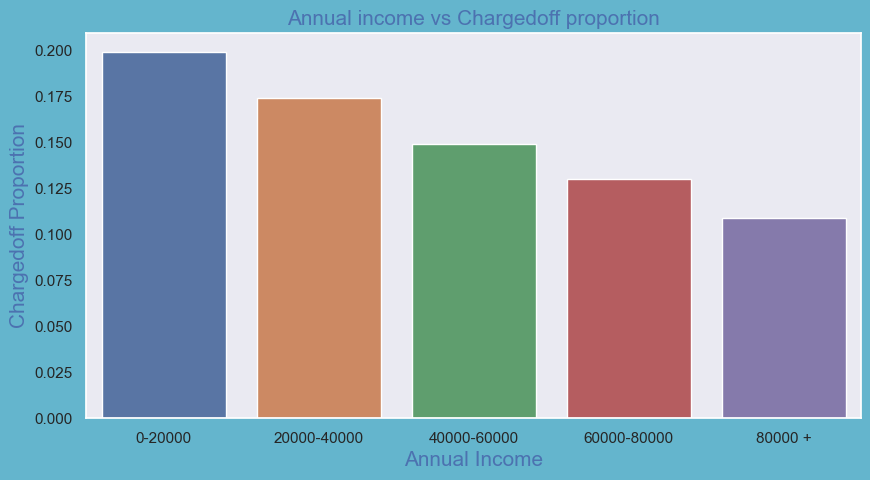

In [122]:
# Bar plot on analysis above. 

fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='c')
ax1.set_title('Annual income vs Chargedoff proportion',fontsize=15,color = 'b')
ax1=sns.barplot(x='annual_inc_category', y='Chargedoff_Proportion', data=annual_inc_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=15,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=15,color='b')
plt.show()


In [123]:
# Bivariate Analysis- 2 on Grade vs Chargedoff_Proportion

gr_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
gr_vs_loan['Total'] = gr_vs_loan['Charged Off'] + gr_vs_loan['Current'] + gr_vs_loan['Fully Paid'] 
gr_vs_loan['Chargedoff_Proportion'] = gr_vs_loan['Charged Off'] / gr_vs_loan['Total']
gr_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,96,14,171,281,0.341637
5,F,291,58,599,948,0.306962
4,E,662,163,1799,2624,0.252287
3,D,1083,208,3773,5064,0.213863
2,C,1326,249,6180,7755,0.170986
1,B,1380,326,9772,11478,0.120230
0,A,593,39,9092,9724,0.060983


## Analysis :-
###  Grade "A" has very less chance of charged off.
### Grade "F" and "G" have very high chance of charged off.
### Chances of charged off is increasing with grade moving from "A" towards "G"

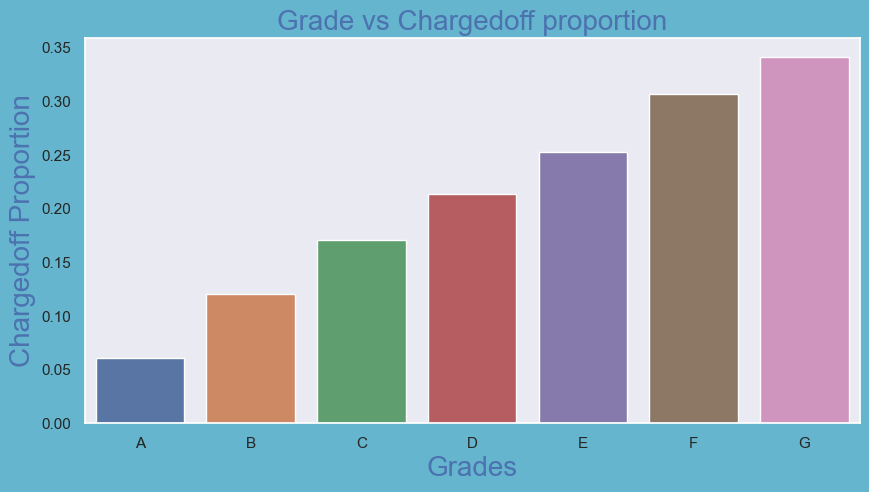

In [124]:
# Bar plot on analysis above
fig, ax1 =  plt.subplots(figsize=(10, 5),facecolor='c')
ax1.set_title('Grade vs Chargedoff proportion',fontsize=20,color='b')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=gr_vs_loan)
ax1.set_xlabel('Grades',fontsize=20,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=20,color ='b')
plt.show()

In [125]:
# Bivariate Analysis -3 Sub grade vs Chargedoff_Proportion

subgr_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgr_vs_loan['Total'] = subgr_vs_loan['Charged Off'] + subgr_vs_loan['Current'] + subgr_vs_loan['Fully Paid'] 
subgr_vs_loan['Chargedoff_Proportion'] = subgr_vs_loan['Charged Off'] / subgr_vs_loan['Total']
subgr_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,52.0,3.0,48.0,103.0,0.504854
32,G3,19.0,3.0,22.0,44.0,0.431818
34,G5,9.0,0.0,14.0,23.0,0.391304
31,G2,26.0,1.0,43.0,70.0,0.371429
30,G1,31.0,9.0,58.0,98.0,0.316327
28,F4,46.0,15.0,94.0,155.0,0.296774
26,F2,67.0,13.0,150.0,230.0,0.291304
23,E4,117.0,25.0,279.0,421.0,0.277910
27,F3,46.0,9.0,111.0,166.0,0.277108
25,F1,80.0,18.0,196.0,294.0,0.272109


## Analysis :-
###  Grade "A" has very less chance of charged off.
### Grade "F" and "G" have very high chance of charged off.
### Among the grades as A1,A2 ...A5 varies, charged off proportion also increased
### Similarly this is applicable for other Grades (B,C....G)

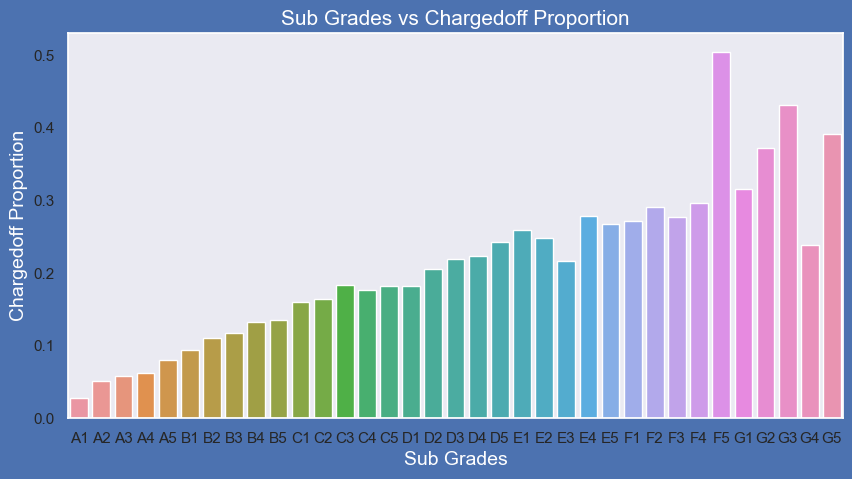

In [126]:
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=subgr_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [127]:
# Bivariate Analysis -4 on interest rate vs Chargedoff_Proportion

intr_rate_vs_loan = loan.groupby(['int_rate_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intr_rate_vs_loan['Total'] = intr_rate_vs_loan['Charged Off'] + intr_rate_vs_loan['Current'] + intr_rate_vs_loan['Fully Paid'] 
intr_rate_vs_loan['Chargedoff_Proportion'] = intr_rate_vs_loan['Charged Off'] / intr_rate_vs_loan['Total']
intr_rate_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_category,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1194,331,3150,4675,0.255401
2,13-16,1608,242,7166,9016,0.178350
1,10-13,1546,326,9604,11476,0.134716
0,0-10,812,75,11056,11943,0.067990


## Analysis :-
### Interest rate < 10% has very less chances of charged off.
### Interest rate > 16% has good chnaces of charged off as compared to other category interest rates.
### Charged off proportion is increasing with higher intrest rates.

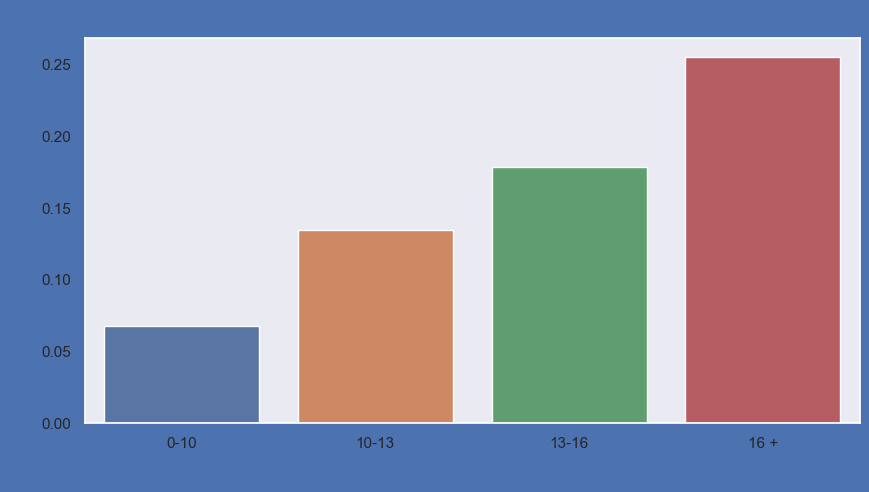

In [128]:
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='b')

ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=20,color='b')
ax1=sns.barplot(x='int_rate_category', y='Chargedoff_Proportion', data=intr_rate_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=20,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=20,color = 'b')
plt.show()

In [129]:
# Bivariate Analysis -5 Employment length vs Chargedoff_Proportion

work_ex_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
work_ex_vs_loan['Total'] = work_ex_vs_loan['Charged Off'] + work_ex_vs_loan['Current'] + work_ex_vs_loan['Fully Paid'] 
work_ex_vs_loan['Chargedoff_Proportion'] = work_ex_vs_loan['Charged Off'] / work_ex_vs_loan['Total']
work_ex_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
9,10.0,1276,355,6658,8289,0.153939
6,7.0,252,58,1395,1705,0.147801
0,1.0,1067,136,6339,7542,0.141474
4,5.0,441,81,2615,3137,0.140580
7,8.0,194,40,1154,1388,0.139769
5,6.0,297,57,1784,2138,0.138915
2,3.0,537,76,3305,3918,0.137060
3,4.0,444,90,2769,3303,0.134423
1,2.0,548,92,3569,4209,0.130197
8,9.0,150,31,1007,1188,0.126263


## Analysis:-
###  Work experience less than 1 year of experience have high chances of getting charged off. Rest years  of experience remains same


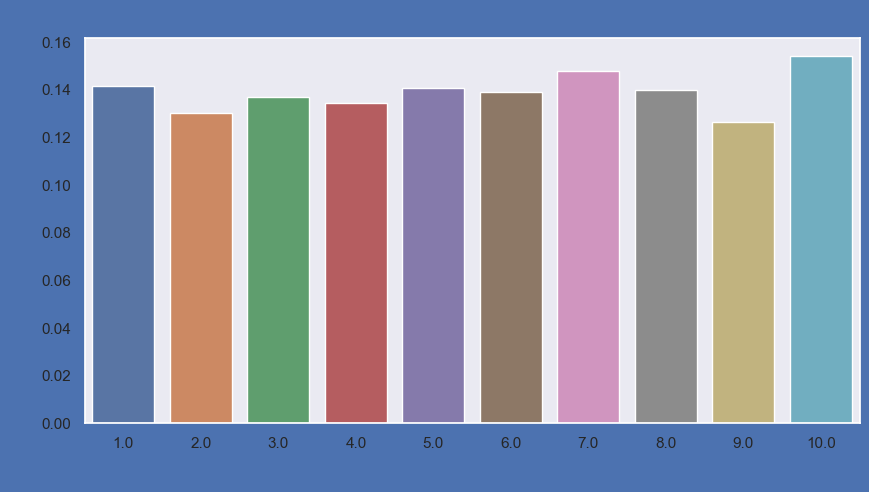

In [130]:
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='b')

ax1.set_title('Work experience vs Chargedoff Proportion',fontsize=20,color='b')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=work_ex_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=20,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=20,color = 'b')
plt.show()


In [131]:
# Bivariate Analysis -6   Loan purpose vs Chargedoff_Proportion.

loan_purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_purpose_vs_loan['Total'] = loan_purpose_vs_loan['Charged Off'] + loan_purpose_vs_loan['Current'] + loan_purpose_vs_loan['Fully Paid'] 
loan_purpose_vs_loan['Chargedoff_Proportion'] = loan_purpose_vs_loan['Charged Off'] /loan_purpose_vs_loan['Total']
loan_purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,454.0,72.0,1175.0,1701.0,0.266902
10,renewable_energy,18.0,1.0,77.0,96.0,0.187500
3,educational,54.0,0.0,259.0,313.0,0.172524
8,moving,90.0,7.0,460.0,557.0,0.161580
7,medical,104.0,9.0,538.0,651.0,0.159754
9,other,607.0,116.0,3105.0,3828.0,0.158568
5,house,55.0,12.0,283.0,350.0,0.157143
2,debt_consolidation,2684.0,550.0,14695.0,17929.0,0.149702
12,vacation,52.0,6.0,314.0,372.0,0.139785
4,home_improvement,322.0,82.0,2262.0,2666.0,0.120780


## Analysis:-
### Small Business applicants have high chances of getting charged off.

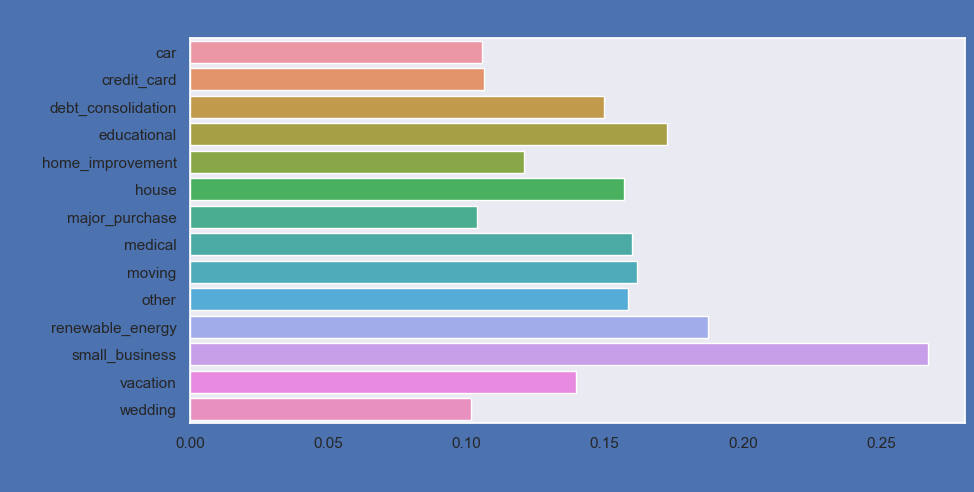

In [133]:
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='b')

ax1.set_title('Purpose of loans vs Chargedoff Proportion',fontsize=20,color = 'b')
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=loan_purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=20,color='b')
ax1.set_xlabel('Chargedoff Proportion',fontsize=20,color = 'b')
plt.show()


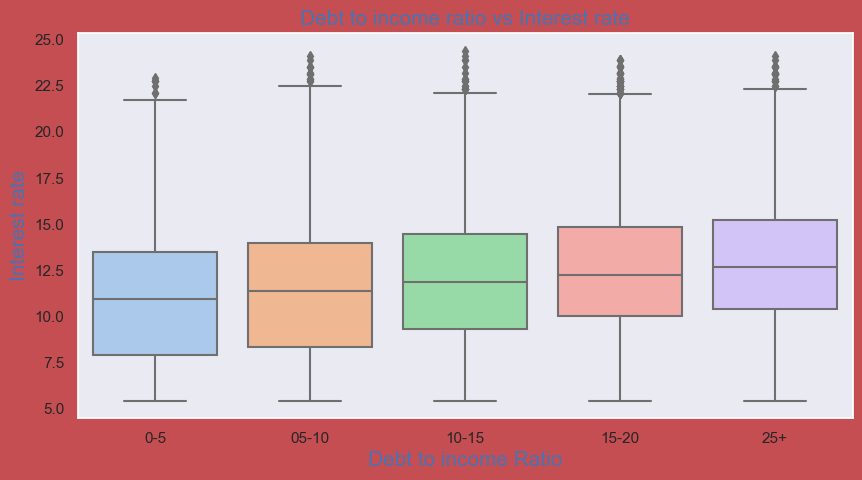

In [146]:
# Bivariate analysis - 7  DTI vs Interest Rate
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='r')


ax = sns.boxplot(y='int_rate', x='dti_category', data =loan,palette='pastel')
ax.set_title('Debt to income ratio vs Interest rate',fontsize=15,color='b')
ax.set_ylabel('Interest rate',fontsize=15,color = 'b')
ax.set_xlabel('Debt to income Ratio',fontsize=15,color = 'b')
plt.show()

## Analysis:-
### Low DTI gets low inteerest rate.
###  There is slight increase in interest rate with increase in DTI.

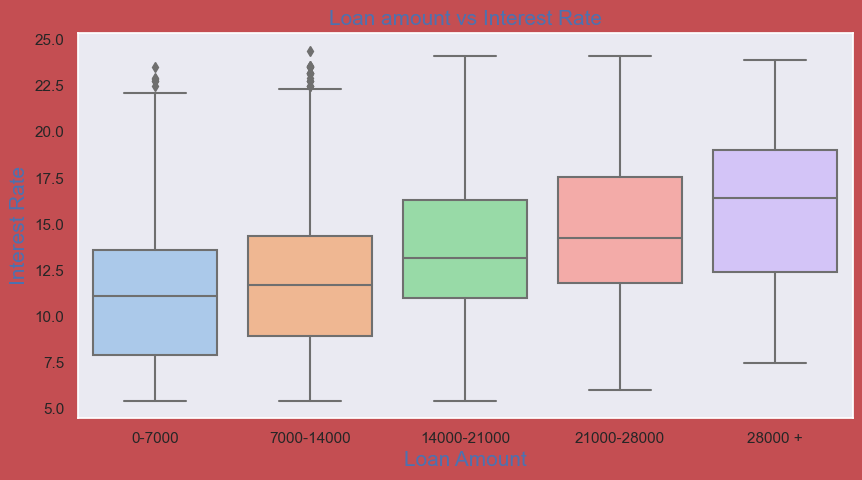

In [158]:
# Bivariate analysis :- 8 Loan Amount vs Interest Rate
fig, ax1 = plt.subplots(figsize=(10, 5),facecolor='r')

ax = sns.boxplot(y='int_rate', x='loan_amnt_category', data =loan,palette='pastel')
ax.set_title('Loan amount vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=15,color = 'b')
ax.set_xlabel('Loan Amount',fontsize=15,color = 'b')
plt.show()


## Analysis :-
### Intrest rate is increasing with an increase in loan amount 

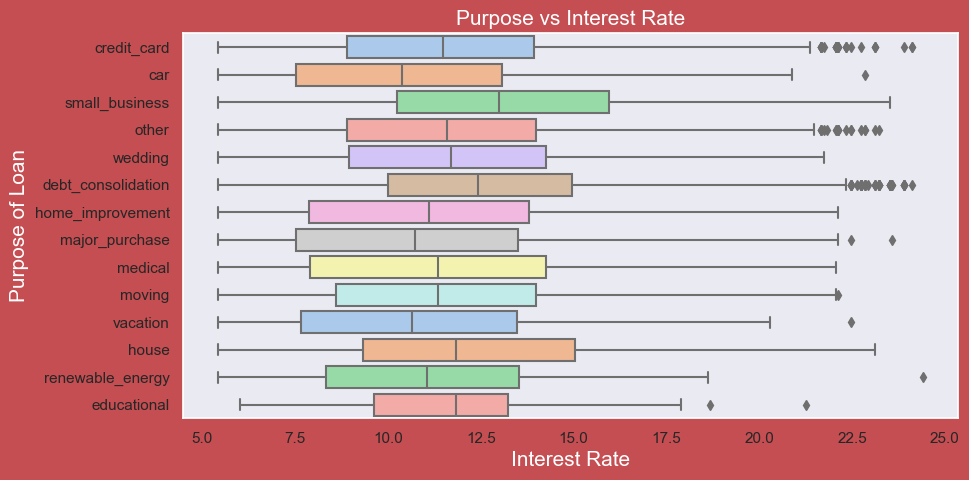

In [161]:
# Bivariate Analysis:- 9 Purpose vs Interest Rate

plt.figure(figsize=(10,5),facecolor='r')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='pastel')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=15,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=15,color = 'w')
plt.show()


## Analysis :-
###  Average intrest rate is highest for small business purpose ie it had to pay the loan with more interest rate then any other purpose



## Recommendations :-

 
###     Following should be carefully analysed before approving for loan

###        - Annual income and DTI(Debt-to-income ratio) is negatively correalted(-0.075).
###          Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts. 
###          This means when annual income is low  then DTI is high & vice versa. 
###        - Most of the loans were taken for the purpose of debt consolidation & paying credit card bill.Charged off is higher in debt_consolidation.

###        - Most of them living in rented home or mortgage  home. Therefore " Charged off"  is high in these category as the application count is high.
###        - Those who had taken loan to repay in 36 months had more percentage of number of applicants getting  charged off as  compared to applicants who had taken loan for 60 months+
###        - Grade "A" has very less chance of charged off.
###            Grade "F" and "G" have very high chance of charged off.
###            Chances of charged off is increasing with grade moving from "A" towards "G".
###        - Small Business applicants have high chances of getting charged off.
###        - Work experience less than 1 year of experience have high chances of getting charged off. Rest years  of experience remains same.
       